In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dir = r'C:\Users\msimp\Pictures\Screenshots\Deep Learning\Code Files\Final_Assignment_Face Mask Dataset\Train'
validation_dir = r'C:\Users\msimp\Pictures\Screenshots\Deep Learning\Code Files\Final_Assignment_Face Mask Dataset\Validation'
test_dir = r'C:\Users\msimp\Pictures\Screenshots\Deep Learning\Code Files\Final_Assignment_Face Mask Dataset\Test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (128, 128),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (128, 128),
                                                              batch_size = 32,
                                                              class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

# CNN Model

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr = 2e-5),
              metrics = ['acc'])

In [10]:
model_history = model.fit(train_generator,
                          epochs = 5,
                          steps_per_epoch = 313,
                          validation_data = validation_generator,
                          validation_steps = 25)

Epoch 1/5
313/313 [==============================] - 239s 764ms/step - loss: 0.4025 - acc: 0.8515 - val_loss: 0.2495 - val_acc: 0.9187
Epoch 2/5
313/313 [==============================] - 353s 1s/step - loss: 0.2522 - acc: 0.9034 - val_loss: 0.2185 - val_acc: 0.9150
Epoch 3/5
313/313 [==============================] - 348s 1s/step - loss: 0.2249 - acc: 0.9149 - val_loss: 0.1598 - val_acc: 0.9475
Epoch 4/5
313/313 [==============================] - 374s 1s/step - loss: 0.2108 - acc: 0.9194 - val_loss: 0.1403 - val_acc: 0.9575
Epoch 5/5
313/313 [==============================] - 443s 1s/step - loss: 0.2019 - acc: 0.9204 - val_loss: 0.1221 - val_acc: 0.9575


In [11]:
model.save('CNN Model - Face Mask Detection.h5')

In [12]:
model_history.params

{'verbose': 1, 'epochs': 5, 'steps': 313}

In [13]:
model_history.history

{'loss': [0.40252622961997986,
  0.25217029452323914,
  0.22488893568515778,
  0.21076184511184692,
  0.2018667310476303],
 'acc': [0.8514999747276306,
  0.9034000039100647,
  0.914900004863739,
  0.9193999767303467,
  0.9204000234603882],
 'val_loss': [0.24945318698883057,
  0.21847772598266602,
  0.15975388884544373,
  0.14033015072345734,
  0.12209634482860565],
 'val_acc': [0.918749988079071,
  0.9150000214576721,
  0.9474999904632568,
  0.9574999809265137,
  0.9574999809265137]}

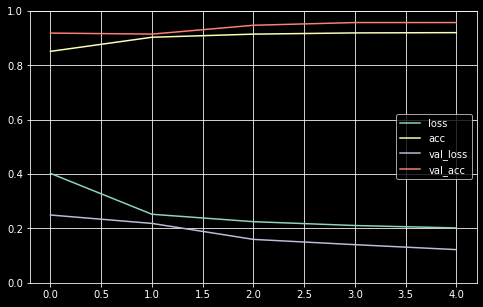

In [14]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [15]:
pd.DataFrame(model_history.history).to_csv('CNN Model - Face Mask Detection History.csv')

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (128, 128),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

Found 992 images belonging to 2 classes.


In [17]:
model.evaluate(test_generator, steps=31)

31/31 [==============================] - 6s 196ms/step - loss: 0.1552 - acc: 0.9456


[0.1552167683839798, 0.9455645084381104]

In [18]:
del model
keras.backend.clear_session()

# VGG 19 Model

In [19]:
from tensorflow.keras.applications import VGG19

In [20]:
conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [21]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [22]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [24]:
conv_base.trainable = False

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr = 2e-5),
              metrics = ['acc'])

In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('VGG19 Model - Face Mask Detection/Model-{epoch:02d}.h5')

In [28]:
model_history = model.fit(train_generator,
                          epochs = 5,
                          steps_per_epoch = 313,
                          validation_data = validation_generator,
                          validation_steps = 25,
                          callbacks = [checkpoint_cb])

Epoch 1/5
313/313 [==============================] - 1346s 4s/step - loss: 0.2865 - acc: 0.9036 - val_loss: 0.0974 - val_acc: 0.9663
Epoch 2/5
313/313 [==============================] - 1391s 4s/step - loss: 0.1510 - acc: 0.9490 - val_loss: 0.0606 - val_acc: 0.9850
Epoch 3/5
313/313 [==============================] - 1360s 4s/step - loss: 0.1230 - acc: 0.9574 - val_loss: 0.0480 - val_acc: 0.9862
Epoch 4/5
313/313 [==============================] - 1392s 4s/step - loss: 0.1095 - acc: 0.9610 - val_loss: 0.0466 - val_acc: 0.9850
Epoch 5/5
313/313 [==============================] - 1351s 4s/step - loss: 0.0948 - acc: 0.9664 - val_loss: 0.0361 - val_acc: 0.9887


In [29]:
model_history.params

{'verbose': 1, 'epochs': 5, 'steps': 313}

In [30]:
model_history.history

{'loss': [0.2864763140678406,
  0.15096761286258698,
  0.12301138043403625,
  0.10945485532283783,
  0.09476998448371887],
 'acc': [0.9035999774932861,
  0.9490000009536743,
  0.9574000239372253,
  0.9610000252723694,
  0.9664000272750854],
 'val_loss': [0.0973888412117958,
  0.06057201698422432,
  0.0480378121137619,
  0.046560946851968765,
  0.03611760959029198],
 'val_acc': [0.9662500023841858,
  0.9850000143051147,
  0.9862499833106995,
  0.9850000143051147,
  0.9887499809265137]}

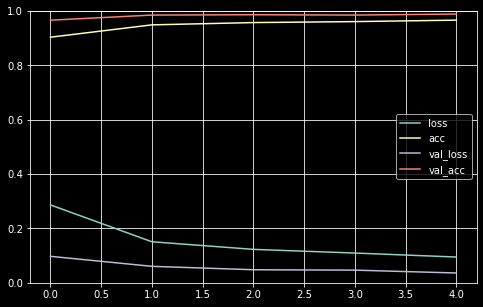

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [32]:
pd.DataFrame(model_history.history).to_csv('VGG19 Model - Face Mask Detection History.csv')

In [33]:
model.evaluate(test_generator, steps=31)

31/31 [==============================] - 110s 4s/step - loss: 0.0400 - acc: 0.9849


[0.039979446679353714, 0.9848790168762207]